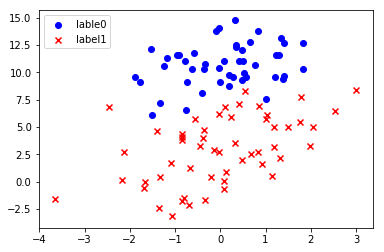

In [1]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt

# 数据是否需要标准化
scale = False

#载入数据
data = np.genfromtxt('LR-testSet.csv', delimiter=',')
x_data = data[:, :-1]
y_data = data[:, -1]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i, 0])
            y0.append(x_data[i, 1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i, 1])
        
    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    
    # 画图例
    plt.legend(handles=[scatter0, scatter1], labels=['lable0', 'label1'], loc='best')
    
plot()
plt.show()


In [2]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
if scale == False:
    plot()
    x_test = np.array([-4], [3])
    y_test = (-logistic.intercept_ - x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
    plt.plot(x_test, y_test, 'k')
    plt.show()
    
predictions = logistic.predict(x_data)
print(classification_report(y_data, predictions))


             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        47
        1.0       1.00      0.92      0.96        53

avg / total       0.96      0.96      0.96       100

